## KNN Approach



### Setup

In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split

import tensorflow as tf


from pyMLaux import plot_history, evaluate_classification_result

2024-03-20 20:40:09.084890: I tensorflow/core/util/port.cc:113] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2024-03-20 20:40:09.111115: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-03-20 20:40:09.111147: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-03-20 20:40:09.111963: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-03-20 20:40:09.117473: I tensorflow/core/platform/cpu_feature_guar

In [2]:
## adapt this directory to your needs
# TODO-> change path to be dynamic 
base_dir = '/home/bac/activity_prediction/implementation/'
data_dir = base_dir + 'data/'

### load & prepare dataset

the following code needs to be adapted for each protein-ligand complex individually

In [3]:
nn_data_raw = pd.read_csv(data_dir+"SEH/SEH.csv")

nn_data_raw

,INDEX,NAME,Hydrophobic_Interaction:PHE387A,Hydrogen_Bond:TYR466A,Hydrogen_Bond:TRP336A,Salt_Bridge:HIS524A,Hydrophobic_Interaction:ASN472A,Hydrogen_Bond:ASN472A,Water_Bridge:ALA365A,Pi-Cation_Interaction:HIS524A,...,Water_Bridge:PHE267A,Hydrophobic_Interaction:PRO371A,Hydrophobic_Interaction:LEU428A,Hydrophobic_Interaction:ALA365A,Hydrogen_Bond:LEU408A,Hydrogen_Bond:TYR383A,Hydrogen_Bond:TYR343A,Hydrophobic_Interaction:HIS524A,Halogen_Bond:ASN472A,LABEL
0,1,IA_147.cdx|SeH_inactivess_minimized|sdf|48,1,1,1,0,0,0,0,0,...,0,0,0,0,0,2,0,0,1,inactive
1,2,IA_10|SeH_inactivess_minimized|sdf|1,0,1,0,1,0,0,0,0,...,2,0,0,0,0,2,0,0,0,inactive
2,3,A_103|SEH_inhibs_minimized|sdf|5,0,1,0,0,1,0,0,0,...,0,0,0,0,0,0,0,1,0,active
3,4,A_76|SEH_inhibs_minimized|sdf|46,0,1,1,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,active
4,5,IA_12|SeH_inactivess_minimized|sdf|22,0,1,0,1,1,0,0,0,...,1,1,0,0,0,0,0,0,0,inactive
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
193,194,IA_178.cdx|SeH_inactivess_minimized|sdf|79,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,inactive
194,195,IA_211.cdx|SeH_inactivess_minimized|sdf|109,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,inactive
195,196,IA_155.cdx|SeH_inactivess_minimized|sdf|56,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,inactive
196,197,IA_163.cdx|SeH_inactivess_minimized|sdf|65,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,inactive


In [4]:
lookup = {'inactive':0,'active':1}

nn_data = {'data': np.array(nn_data_raw.iloc[:, 2:-1]),
             'target': np.array([lookup[y] for y in nn_data_raw.iloc[0:,-1]]),
             'feature_names': nn_data_raw.columns[2:-1],
             'target_names': ['inactive', 'active']}


split into train- and test-set

In [5]:
X_train, X_test, y_train, y_test = train_test_split(nn_data['data'], nn_data['target'],
                                                    test_size=0.3, random_state=4232)



### train and apply neural network

In [13]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Input(shape=(nn_data['data'].shape[1], )),
    tf.keras.layers.Dense(10, activation='relu'),
    tf.keras.layers.Dropout(0.3),
    tf.keras.layers.Dense(10, activation='relu'),
    tf.keras.layers.Dropout(0.3),
    tf.keras.layers.Dense(10, activation='softmax')
])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_6 (Dense)             (None, 10)                760       
                                                                 
 dropout_3 (Dropout)         (None, 10)                0         
                                                                 
 dense_7 (Dense)             (None, 10)                110       
                                                                 
 dropout_4 (Dropout)         (None, 10)                0         
                                                                 
 dense_8 (Dense)             (None, 10)                110       
                                                                 
Total params: 980 (3.83 KB)
Trainable params: 980 (3.83 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


Epoch 1/150
7/7 - 1s - loss: 2.0582 - accuracy: 0.0818 - val_loss: 1.9948 - val_accuracy: 0.0357 - 742ms/epoch - 106ms/step
Epoch 2/150
7/7 - 0s - loss: 1.9782 - accuracy: 0.1091 - val_loss: 1.9183 - val_accuracy: 0.0714 - 100ms/epoch - 14ms/step
Epoch 3/150
7/7 - 0s - loss: 1.8788 - accuracy: 0.2364 - val_loss: 1.8348 - val_accuracy: 0.1071 - 87ms/epoch - 12ms/step
Epoch 4/150
7/7 - 0s - loss: 1.8188 - accuracy: 0.2909 - val_loss: 1.7437 - val_accuracy: 0.1429 - 92ms/epoch - 13ms/step
Epoch 5/150
7/7 - 0s - loss: 1.8275 - accuracy: 0.2636 - val_loss: 1.6552 - val_accuracy: 0.4286 - 90ms/epoch - 13ms/step
Epoch 6/150
7/7 - 0s - loss: 1.7254 - accuracy: 0.3545 - val_loss: 1.5636 - val_accuracy: 0.6071 - 107ms/epoch - 15ms/step
Epoch 7/150
7/7 - 0s - loss: 1.6836 - accuracy: 0.4273 - val_loss: 1.4753 - val_accuracy: 0.7857 - 89ms/epoch - 13ms/step
Epoch 8/150
7/7 - 0s - loss: 1.5670 - accuracy: 0.5818 - val_loss: 1.3840 - val_accuracy: 0.8214 - 92ms/epoch - 13ms/step
Epoch 9/150
7/7 - 0s

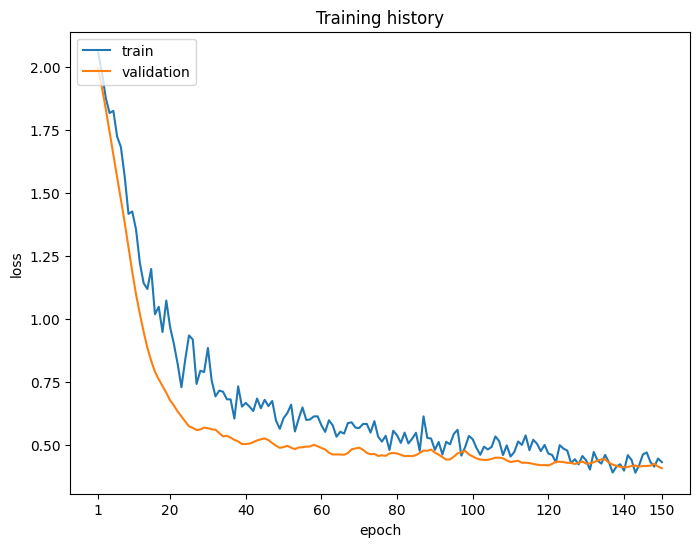

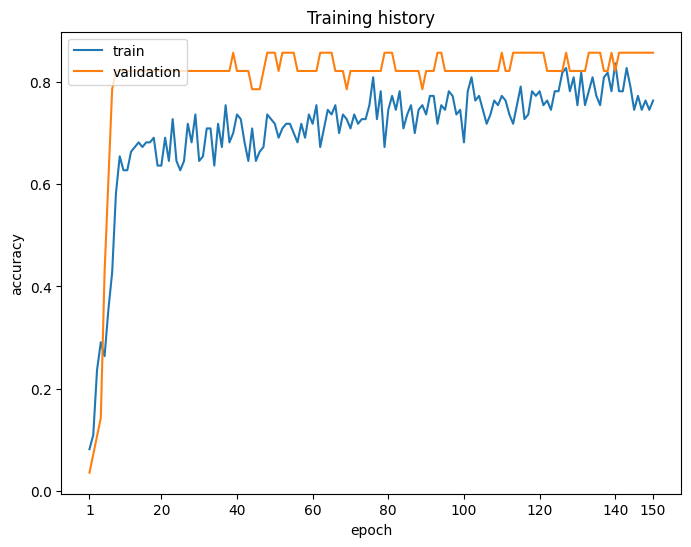

In [14]:
history = model.fit(x=X_train, y=y_train, epochs=150, batch_size=16, validation_split=0.2, verbose=2)
plot_history(history)

Evaluate Testdata using model

In [15]:
pred = model.predict(X_test)

evaluate_classification_result(y_test, pred, classes=nn_data["target_names"])


2/2 [==============================] - 0s 5ms/step
[[43  2]
 [12  3]]


Class inactive:
    Sensitivity (TPR):  95.556% (43 of 45)
    Specificity (TNR):  20.000% (3 of 15)
    Precision:          78.182% (43 of 55)
    Neg. pred. value:   60.000% (3 of 5)
Class active:
    Sensitivity (TPR):  20.000% (3 of 15)
    Specificity (TNR):  95.556% (43 of 45)
    Precision:          60.000% (3 of 5)
    Neg. pred. value:   78.182% (43 of 55)

Overall accuracy:   76.667% (46 of 60)
Balanced accuracy:  57.778%


array([[43,  2],
       [12,  3]])